## Setup Colab

In [11]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
wdir = '/content/gdrive/Othercomputers/My MacBook Air/cell-jamming/experiment_b'

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
!pip install scipy==1.10.0
from scipy.stats.stats import pearsonr 
np.set_printoptions(linewidth=np.inf)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-13-036616552e3d>:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [14]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


## Correlation as a function of t, no errors

In [15]:
figure_name = 'corr_t.png'

data_folder_name = 'data_extracted'
figures_dir = 'figures'
n_frames = 29

In [16]:
df = pd.read_csv(os.path.join(wdir, data_folder_name, 'grid_data.csv'))

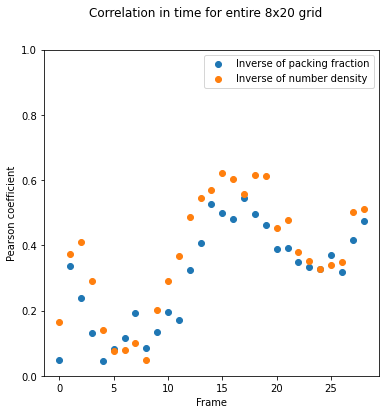

In [17]:
T = []
R_Phi = []
R_N = []

#plt.rcParams.update({'font.size': 22})

for i in range(0, n_frames):

  df_filtered = df[df['t'] == i]
  df_filtered = df_filtered.reset_index(drop=True)
  
  Phi = df_filtered['phi'].to_numpy()
  Phi_inv = 1/Phi
  U = df_filtered['u'].to_numpy()
  N = df_filtered['N'].to_numpy()
  N_inv = 1/N

  pearson_Phi = pearsonr(Phi_inv, U)[0]
  R_Phi.append(pearson_Phi)

  pearson_N = pearsonr(N_inv, U)[0]
  R_N.append(pearson_N)

  T.append(i)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle('Correlation in time for entire 8x20 grid')
ax.scatter(T, R_Phi, label='Inverse of packing fraction')
ax.scatter(T, R_N, label='Inverse of number density')
ax.set_xlabel('Frame')
ax.set_ylabel('Pearson coefficient')
ax.set_ylim(0,1)
ax.legend()
  
plt.show()
fig.savefig(os.path.join(wdir, figures_dir, figure_name))
plt.close(fig)

## Correlation as a function of t, with errors

In [18]:
figure_name = 'corr_t_errors.png'

data_folder_name = 'data_extracted'
figures_dir = 'figures'
n_frames = 29

In [19]:
df = pd.read_csv(os.path.join(wdir, data_folder_name, 'grid_data.csv'))

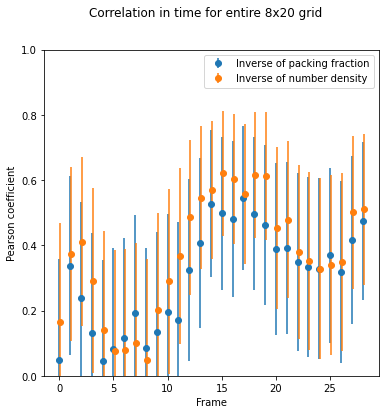

In [21]:
T_Phi = []
T_N = []
R_Phi = []
R_N = []
E_Phi = []
E_N = []

#plt.rcParams.update({'font.size': 22})

for i in range(0, n_frames):

  df_filtered = df[df['t'] == i]
  df_filtered = df_filtered.reset_index(drop=True)
  
  Phi = df_filtered['phi'].to_numpy()
  Phi_inv = 1/Phi
  U = df_filtered['u'].to_numpy()
  N = df_filtered['N'].to_numpy()
  N_inv = 1/N

  pearson_Phi = pearsonr(Phi_inv, U)
  R_Phi.append(pearson_Phi[0])
  phi_error = pearson_Phi.confidence_interval(confidence_level=0.95)[1] - pearson_Phi.confidence_interval(confidence_level=0.95)[0]
  E_Phi.append(phi_error)

  pearson_N = pearsonr(N_inv, U)
  R_N.append(pearson_N[0])
  N_error = pearson_N.confidence_interval(confidence_level=0.95)[1] - pearson_N.confidence_interval(confidence_level=0.95)[0]
  E_N.append(N_error)

  T_Phi.append(i)
  T_N.append(i+0.1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle('Correlation in time for entire 8x20 grid')
ax.errorbar(T_Phi, R_Phi, yerr=E_Phi, fmt='o', label='Inverse of packing fraction')
ax.errorbar(T_N, R_N, yerr=E_N, fmt='o', label='Inverse of number density')
ax.set_xlabel('Frame')
ax.set_ylabel('Pearson coefficient')
ax.set_ylim(0,1)
ax.legend()
  
plt.show()
fig.savefig(os.path.join(wdir, figures_dir, figure_name))
plt.close(fig)